## Project 2 : Ames Housing Data and Kaggle Challenge
### 02. Preprocessing and Feature Engineering

**steps**
 
 - Brainstorming or testing features.
 - Deciding what features to create.
 - Creating features.
 - Checking how the features work with your model.
 - Improving features (if needed).
 - Return to step 1.
 - "Do data science!"

**Import all the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler\

%matplotlib inline


In [2]:
#Retrieve the datasets
%store -r train
%store -r test

In [3]:
Xtrain = train.iloc[:, 0:78]
ytrain = train.iloc[:, 78]
Xtest  = test

**Combine the two datasets**

In [4]:
#Add a separation column on each dataset 
Xtrain['both'] = 'train_data'
Xtest['both']  = 'test_data'

In [5]:
#concat the two datasets on a common column.
combined = pd.concat([Xtrain, Xtest], sort = False)

In [6]:
#check the new dataframe
combined.head()

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,both
0,109,533352170,60,RL,13517,Pave,99.6959,IR1,Lvl,AllPub,...,0,0,99.6959,99.6959,99.6959,0,3,2010,WD,train_data
1,544,531379050,60,RL,11492,Pave,99.6959,IR1,Lvl,AllPub,...,0,0,99.6959,99.6959,99.6959,0,4,2009,WD,train_data
2,153,535304180,20,RL,7922,Pave,99.6959,Reg,Lvl,AllPub,...,0,0,99.6959,99.6959,99.6959,0,1,2010,WD,train_data
3,318,916386060,60,RL,9802,Pave,99.6959,Reg,Lvl,AllPub,...,0,0,99.6959,99.6959,99.6959,0,4,2010,WD,train_data
4,255,906425045,50,RL,14235,Pave,99.6959,IR1,Lvl,AllPub,...,0,0,99.6959,99.6959,99.6959,0,3,2010,WD,train_data


In [7]:
combined.shape

(2929, 79)

In [8]:
#first lets drop the id and pid
combined.drop(columns = ['id','pid'], inplace = True)

In [9]:
#take log of variables with unbalanced scale
log_saleprice = train['saleprice'].map(np.log)

combined['log_totrms_abvgrd'] = combined['totrms_abvgrd'].map(np.log)
combined['log_1st_flr_sf'] = combined['1st_flr_sf'].map(np.log)
combined['log_gr_liv_area'] = combined['gr_liv_area'].map(np.log)

In [10]:
#delete the original columns for combined data
combined.drop(columns=['totrms_abvgrd', '1st_flr_sf','gr_liv_area'], inplace = True)

**Create new features**

In [11]:
combined['remod*quality'] = combined['overall_qual'] * combined['year_remod_add']
combined['gr_liv_area * 1st_flr'] = combined['log_gr_liv_area'] * combined['log_1st_flr_sf']
combined['quality * condition'] = np.log(combined['overall_cond'] )* np.log(combined['overall_qual'])

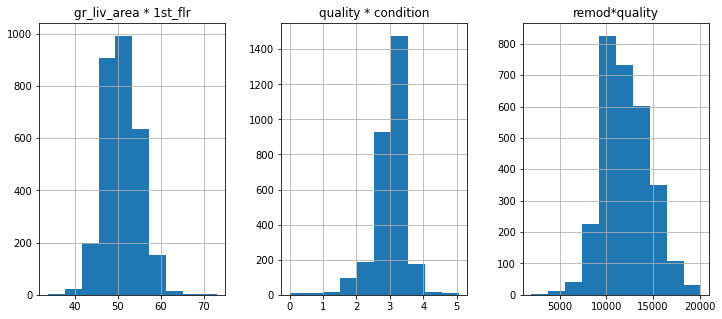

In [12]:
#check the distribution
combined.hist(column = ['remod*quality', 'gr_liv_area * 1st_flr',
                        'quality * condition'],
              figsize = (12,5), layout = (1,3));

**create dummies**

In [13]:
#create a list of object columns
obj_cols = combined.columns[combined.dtypes == object]
obj_cols

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type', 'both'],
      dtype='object')

In [14]:
#check the respective attributes for every feature 
for i,v in enumerate(obj_cols):
    print(v+'    ' , combined[v].unique())

ms_zoning     ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street     ['Pave' 'Grvl']
alley     [99.69590931493346 'Pave' 'Grvl' 0]
lot_shape     ['IR1' 'Reg' 'IR2' 'IR3']
land_contour     ['Lvl' 'HLS' 'Bnk' 'Low']
utilities     ['AllPub' 'NoSeWa' 'NoSewr']
lot_config     ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
land_slope     ['Gtl' 'Sev' 'Mod']
neighborhood     ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition_1     ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition_2     ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldg_type     ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
house_style     ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roof_style     ['Gable' 'Hip' 'Flat' 'Mansar

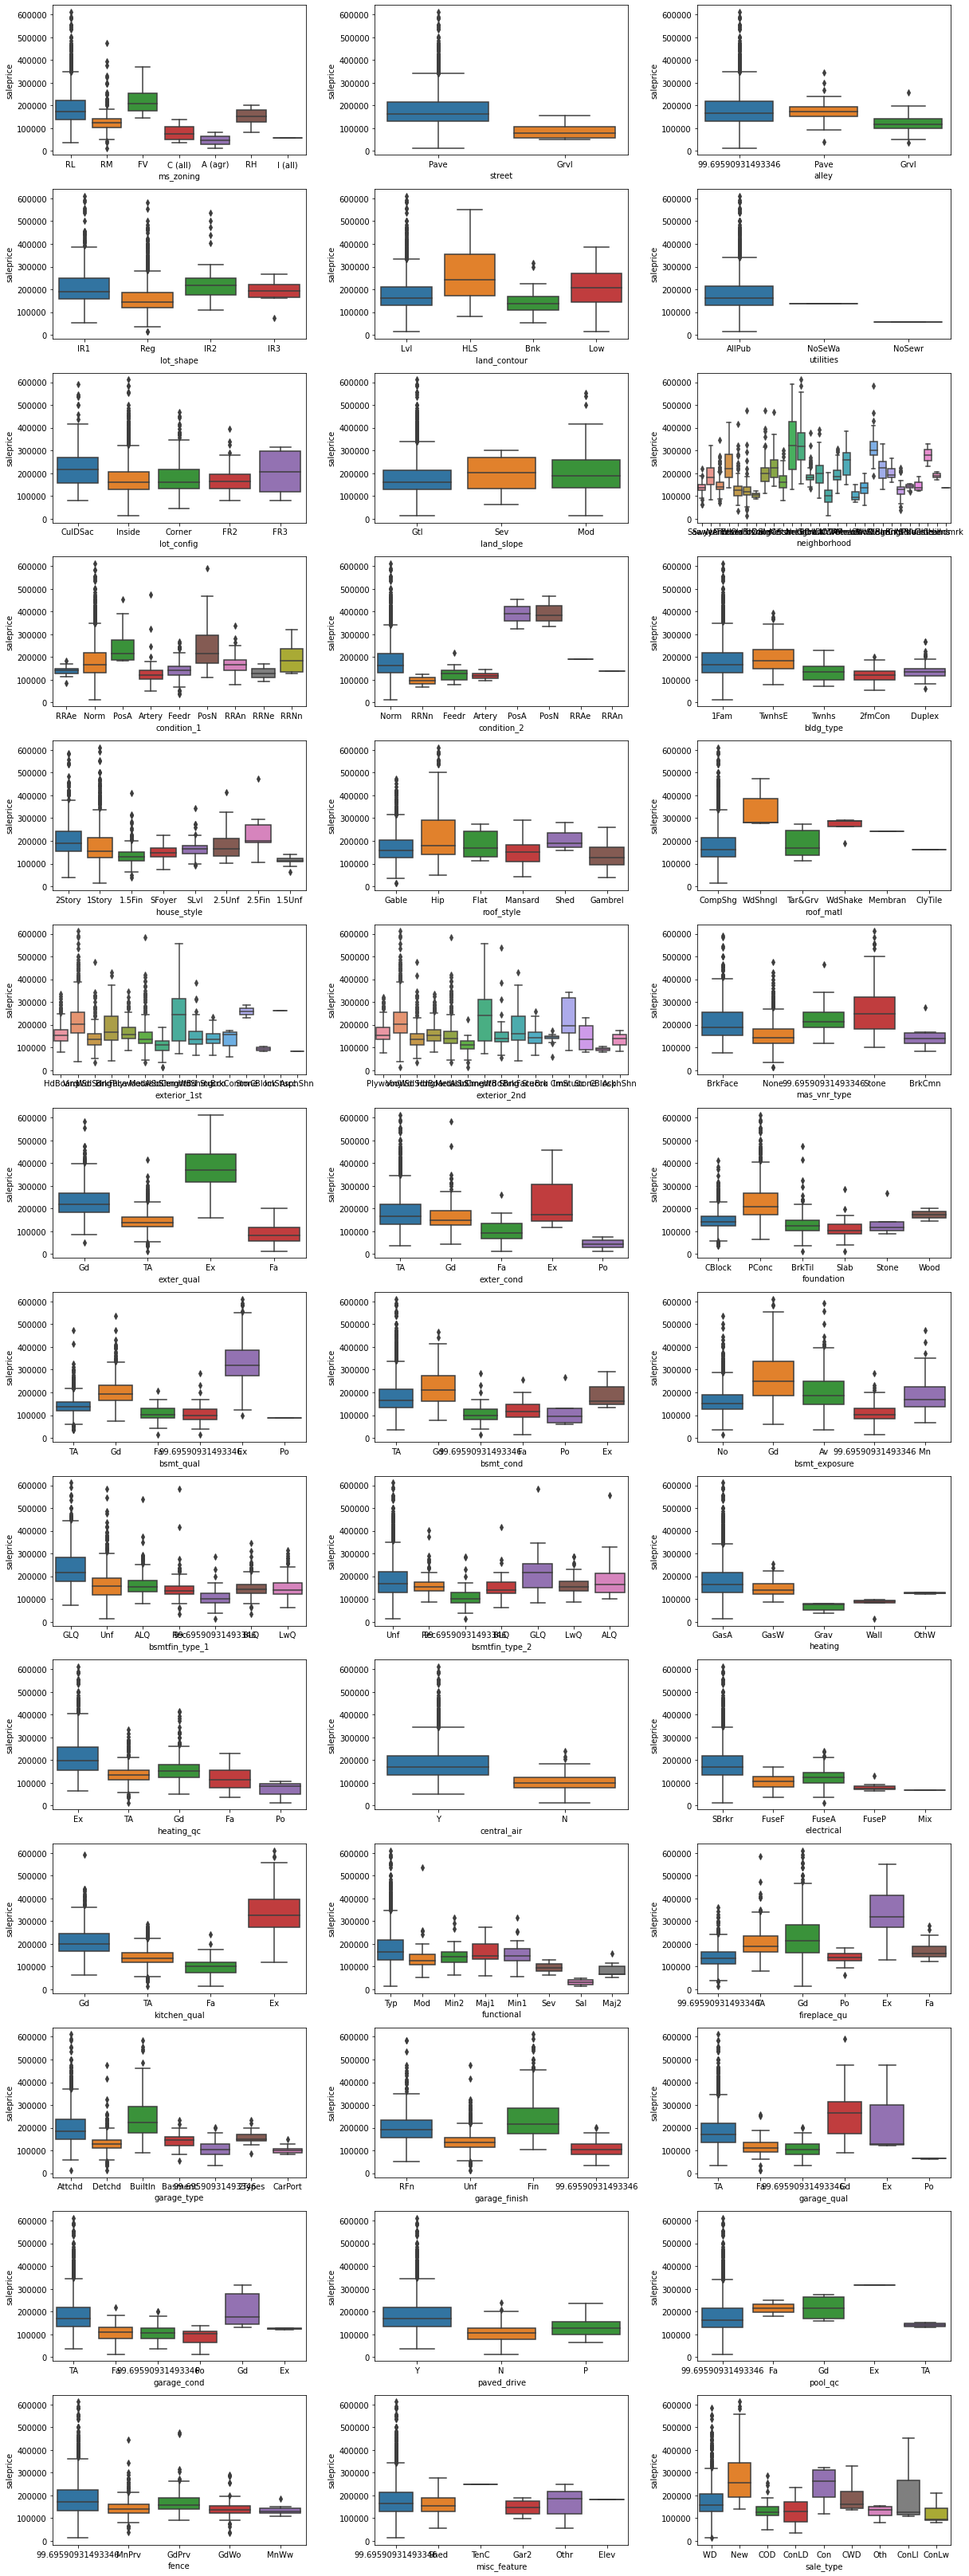

In [15]:
### check the distribution of the attributes relative to saleprice
plt.figure(figsize = (17,45))

for i in range(len(obj_cols)-1):
    plt.subplot((len(obj_cols)/3),3, i+1)
    
    sns.boxplot(x = obj_cols[i], y = 'saleprice', data = train)
plt.tight_layout();

In [16]:
categorical = combined.select_dtypes(include = 'object').columns
categorical

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type', 'both'],
      dtype='object')

In [17]:
#create dummy columns
combined =  pd.get_dummies(combined, columns = ['neighborhood', 'exterior_1st', 'exterior_2nd',
                                         'functional', 'exter_qual', 'condition_2'], 
                          drop_first = True, dtype= float)   

In [18]:
combined.shape

(2929, 149)

In [19]:
combined.columns

Index(['ms_subclass', 'ms_zoning', 'lot_area', 'street', 'alley', 'lot_shape',
       'land_contour', 'utilities', 'lot_config', 'land_slope',
       ...
       'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA', 'condition_2_Feedr',
       'condition_2_Norm', 'condition_2_PosA', 'condition_2_PosN',
       'condition_2_RRAe', 'condition_2_RRAn', 'condition_2_RRNn'],
      dtype='object', length=149)

**Separate the datasets**

In [20]:
Xtrain = combined[combined['both']== 'train_data']
ytest = combined[combined['both']== 'test_data']

In [21]:
#drop the 'both' column
Xtrain.drop(columns = 'both', inplace = True)
ytest.drop(columns = 'both', inplace = True)

/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
Xtrain.head()

,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,...,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn
0,60,RL,13517,Pave,99.6959,IR1,Lvl,AllPub,CulDSac,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,RL,11492,Pave,99.6959,IR1,Lvl,AllPub,CulDSac,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,20,RL,7922,Pave,99.6959,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60,RL,9802,Pave,99.6959,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,50,RL,14235,Pave,99.6959,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ytest.head()

,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,...,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn
0,190,RM,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,90,RL,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,30,RM,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20,RL,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# drop the categorical variables
Xtrain.drop(columns = Xtrain.select_dtypes(include = 'object').columns, inplace =True)
ytest.drop(columns = ytest.select_dtypes(include = 'object').columns, inplace =True)

/Users/kalz/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
Xtrain.shape

(2051, 112)

In [26]:
ytest.shape

(878, 112)

In [27]:
ytrain.shape

(2051,)

In [28]:
%store Xtrain
%store ytest
%store log_saleprice
%store combined

Stored 'Xtrain' (DataFrame)
Stored 'ytest' (DataFrame)
Stored 'log_saleprice' (Series)
Stored 'combined' (DataFrame)
